In [1]:
# Import all required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# List all files in the current directory
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Deep learning')
os.listdir()

['bank_churn.png',
 'bank_customer_churn.csv',
 'bank_customer_churn_ann.ipynb',
 'Customer churn prediction.ipynb',
 'deep-learning-keras-tf-tutorial-master.zip',
 'homeprices_banglore.csv',
 'sonar_dataset_regularization.csv',
 'telco_cust.png',
 'Telco_customer_churn.csv']

In [3]:
# Reading data by using pandas
pd.set_option('display.max_columns', None) # Displays all columns in the data frame
data = pd.read_csv('Telco_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dropping unwanted columns
data.drop('customerID', axis=1, inplace=True)

In [5]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# Categorical features in the data
cat_feat = data.select_dtypes(include='O')
cat_feat.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Numerical data in the features
num_feat = data.select_dtypes(include='number')
num_feat.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [8]:
# Converting data types into correct format
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Replacing null values with mean value
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [10]:
# Null values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Unique values
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

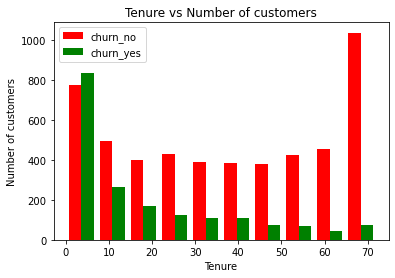

In [12]:
# Visualization of important features which effects the target feature
tenure_churn_no = data[data.Churn =='No'].tenure
tenure_churn_Yes = data[data.Churn =='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Tenure vs Number of customers')

plt.hist([tenure_churn_no, tenure_churn_Yes], color=['red', 'green'], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

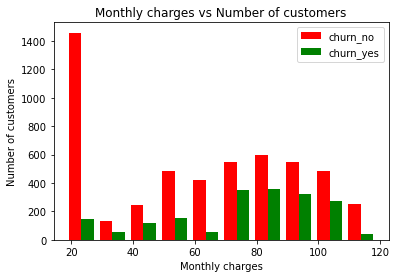

In [13]:
# Churn of customers with respective to monthly charges
mc_churn_no = data[data.Churn =='No'].MonthlyCharges
mc_churn_Yes = data[data.Churn =='Yes'].MonthlyCharges

plt.xlabel('Monthly charges')
plt.ylabel('Number of customers')
plt.title('Monthly charges vs Number of customers')

plt.hist([mc_churn_no, mc_churn_Yes], color=['red', 'green'], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

In [14]:
# Unique values
def print_unique_values(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [15]:
print_unique_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
# replacing values
data.replace(to_replace='No phone service', value = 'No', inplace=True)
data.replace(to_replace='No internet service', value = 'No', inplace=True)

In [17]:
print_unique_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [19]:
# Feature encoding
for i in yes_no_columns:
    data[i].replace({'Yes':1, 'No':0}, inplace=True)

In [20]:
print_unique_values(data)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
for col in data:
    print(f'{col}: {data[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
# One-hot encoding
final_data = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
final_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
final_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5792,1,1,0,0,15,1,0,1,0,1,1,0,1,1,96.3,1426.75,1,0,1,0,1,0,0,0,0,0,1
501,1,1,1,0,71,1,1,1,0,0,0,0,0,1,80.7,5676.00,0,0,1,0,0,0,1,0,1,0,0
762,0,0,1,0,3,1,0,0,0,0,0,0,0,1,70.3,208.85,1,0,1,0,1,0,0,0,0,1,0


In [25]:
scale_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

final_data[scale_columns] = scaler.fit_transform(final_data[scale_columns])

In [27]:
for col in final_data:
    print(f'{col}: {final_data[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

In [91]:
# Declaring independent and dependent features
X = final_data.drop('Churn', axis=1)
y = final_data['Churn']

In [29]:
# Splitting data into training and testing tests
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
# Shape of the training data
X_train.shape

(5282, 26)

In [31]:
# Shape of the testing data
X_test.shape

(1761, 26)

In [32]:
# Importing tesnor flow library
import tensorflow as tf
from tensorflow import keras

In [33]:
# Model intitialization
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])


In [34]:
# Model training with training data
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
166/166 [==============================] - 2s 4ms/step - loss: 0.5109 - accuracy: 0.7408
Epoch 2/10
166/166 [==============================] - 1s 3ms/step - loss: 0.4409 - accuracy: 0.7866
Epoch 3/10
166/166 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7929
Epoch 4/10
166/166 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.7959
Epoch 5/10
166/166 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.7953
Epoch 6/10
166/166 [==============================] - 1s 3ms/step - loss: 0.4207 - accuracy: 0.7972
Epoch 7/10
166/166 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.7978
Epoch 8/10
166/166 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8020
Epoch 9/10
166/166 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8012
Epoch 10/10
166/166 [==============================] - 1s 3ms/step - loss: 0.4130 - accuracy: 0.8041

In [35]:
# Model evaluation on testing data
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8126


[0.41213366389274597, 0.8126064538955688]

In [36]:
yp = model.predict(X_test)
yp[:5]

56/56 [==============================] - 0s 2ms/step


array([[0.52199346],
       [0.11926793],
       [0.00560777],
       [0.65617204],
       [0.02192819]], dtype=float32)

In [37]:
y_pred = []
for i in yp:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[0:5]

[1, 0, 0, 1, 0]

In [39]:
y_test[:5]

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int64

In [40]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1282
           1       0.71      0.52      0.60       479

    accuracy                           0.81      1761
   macro avg       0.77      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



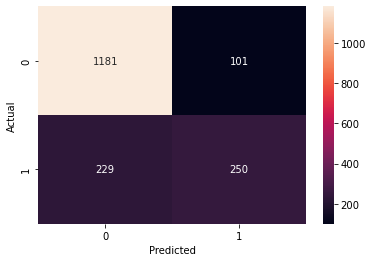

In [41]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =', round(accuracy, 2)*100)

Accuracy = 81.0


In [43]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape = (26,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                 loss = loss, 
                 metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print('Classification report : \n', classification_report(y_test, y_preds))
    
    return y_preds

In [44]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
166/166 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.7429
Epoch 2/100
166/166 [==============================] - 1s 3ms/step - loss: 0.4371 - accuracy: 0.7874
Epoch 3/100
166/166 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.7942
Epoch 4/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.7988
Epoch 5/100
166/166 [==============================] - 1s 3ms/step - loss: 0.4207 - accuracy: 0.8005
Epoch 6/100
166/166 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8035
Epoch 7/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8035
Epoch 8/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8033
Epoch 9/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8061
Epoch 10/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4137 - accura

### Under sampling

In [ ]:
# Random sampling by using Imbalanced learn

In [94]:
final_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [95]:
X = final_data.drop('Churn', axis=1)
y = final_data['Churn']

In [96]:
final_data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [97]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()

In [98]:
X_res, y_res = under_sampler.fit_resample(X, y)

In [99]:
from collections import Counter
Counter(y_res)

Counter({0: 1869, 1: 1869})

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [101]:
Counter(y_train)

Counter({0: 1387, 1: 1416})

In [102]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.5915 - accuracy: 0.7060
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7535
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7635
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7628
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7588
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.7635
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7635
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7649
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7624
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7642
Epoch 11/

### Over sampling

In [103]:
final_data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [104]:
count_class_0, count_class_1 = final_data.Churn.value_counts()
print('count_class_0 = ', count_class_0,'\n','count_class_1 = ',count_class_1)

count_class_0 =  5174 
 count_class_1 =  1869


In [105]:
data_class_0 = final_data[final_data.Churn==0]
data_class_1 = final_data[final_data.Churn==1]

In [106]:
over_sample_1 = data_class_1.sample(count_class_0, replace=True)

over_sample_data = pd.concat([data_class_0, over_sample_1], axis=0)

In [107]:
over_sample_data.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [108]:
X = over_sample_data.drop('Churn', axis=1)
y = over_sample_data['Churn']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
y_train.value_counts()

1    4148
0    4130
Name: Churn, dtype: int64

In [111]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5443 - accuracy: 0.7336
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4920 - accuracy: 0.7563
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4843 - accuracy: 0.7630
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.7667
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4758 - accuracy: 0.7711
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4730 - accuracy: 0.7740
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4700 - accuracy: 0.7708
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7747
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4626 - accuracy: 0.7789
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4609 - accura

### SMOTE

In [113]:
X = final_data.drop('Churn', axis=1)
y = final_data['Churn']

In [115]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_res, y_res = smote.fit_resample(X, y)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [117]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5340 - accuracy: 0.7398
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4750 - accuracy: 0.7748
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.7771
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.7804
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4566 - accuracy: 0.7794
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.7820
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4488 - accuracy: 0.7867
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.7884
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4408 - accuracy: 0.7916
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4385 - accura

### Under sampling by ensemble technique

In [124]:
# Regain Original features and labels
X = final_data.drop('Churn',axis='columns')
y = final_data['Churn']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [126]:
final_data_1 = X_train.copy()
final_data_1['Churn'] = y_train

In [127]:
data_class_0 = final_data_1[final_data_1.Churn==0]
data_class_1 = final_data_1[final_data_1.Churn==1]

In [128]:
data_class_0.Churn.value_counts()

0    4139
Name: Churn, dtype: int64

In [129]:
4139/3

1379.6666666666667

In [119]:
def get_train_batch(major_class_data, minor_class_data, start, end):
    train_data = pd.concat([major_class_data[start:end], minor_class_data], axis=0)
    
    X_train = train_data.drop('Churn', axis=1)
    y_train = train_data['Churn']
    
    return X_train, y_train

In [130]:
X_train, y_train = get_train_batch(data_class_0, data_class_1, 0, 1380)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.7183
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7642
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7701
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7701
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.7795
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.7795
Epoch 7/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7809
Epoch 8/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.7812
Epoch 9/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7833
Epoch 10/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7826
Epoch 11/

In [131]:
1380+1380

2760

In [132]:
X_train, y_train = get_train_batch(data_class_0, data_class_1, 1380, 2760)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6174 - accuracy: 0.6776
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7562
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7617
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7586
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7597
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4861 - accuracy: 0.7621
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7628
Epoch 8/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7638
Epoch 9/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7677
Epoch 10/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7683
Epoch 11/

In [133]:
X_train, y_train = get_train_batch(data_class_0, data_class_1, 2760, 4139)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6303 - accuracy: 0.6653
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7662
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7627
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7690
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7700
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7669
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7735
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7697
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7714
Epoch 10/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7787
Epoch 11/

In [135]:
final_y_pred = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred3[i]+y_pred3[i]
    
    if n_ones > 1:
        final_y_pred[i] = 1
    else:
        final_y_pred[i] = 0

In [137]:
cl_rep = classification_report(y_test, final_y_pred)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.80      0.58       374

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.70      0.71      1409



### Final model

In [138]:
X = final_data.drop('Churn', axis=1)
y = final_data['Churn']

In [139]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_res, y_res = smote.fit_resample(X, y)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [141]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7420
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.7736
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4636 - accuracy: 0.7804
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.7841
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.7858
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.7890
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4427 - accuracy: 0.7897
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4374 - accuracy: 0.7951
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4340 - accuracy: 0.7951
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4307 - accura